In [22]:
#to do
#try to use clob instead of gamma to find the games so that we can take advtange of the tag param
#maybe can keep existing thing for visualization, but we'll see
#determine # of crossovers (have a rough model of it already)
#then find average number of crosses per game
#do this with a distribution so we can see what that looks like 
#explore outliers like comebacks, trap games
#find a live score api 

In [2]:
import requests
import json
import py_clob_client
from py_clob_client.client import ClobClient
from py_clob_client.constants import POLYGON

In [3]:
# Initialize the CLOB API client
clob_client = ClobClient(
    host="https://clob.polymarket.com",  # CLOB API URL
    chain_id=POLYGON                     # Specify the chain (Polygon in this case)
)

In [4]:
from py_clob_client.client import ClobClient


In [5]:
from py_clob_client.constants import POLYGON
from py_clob_client.client import ClobClient
from py_clob_client.clob_types import OrderArgs
from py_clob_client.order_builder.constants import BUY
import requests
import time
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
from datetime import datetime

In [6]:
gamma_api_url = "https://gamma-api.polymarket.com"
time = "2024-11-10T00:00:00Z"

In [7]:
tag = 'nba'

In [ ]:
games = []
response = requests.get(f"{gamma_api_url}/markets?start_date_min={time}&limit=1000&tag=745")
if response.status_code == 200:
    markets_data = response.json()
    #for market in markets_data:
       # if 'NBA' in market.get('question', ''):
       #     market_id = market.get('id')
        ##    question = market.get('questin')
        #    print(f"Market ID: {market_id} | Question: {question}")
    for market in markets_data:
        #all the nba games have this in the description 
       
        if 'in the upcoming nba game' in (market.get('description')).lower():
            print(market.get("question"))
           # print(market.get("description"))
            #print(market.get("conditionId"))
           # print(market.get("clobTokenIds"))
           # print(market.get("endDate"))
            #print(market)
            #print(market)
            match = [market.get("question"),market.get("conditionId"),json.loads(market.get("clobTokenIds")), [market.get("startDate"),market.get("endDate")],market.get("slug")]
            games.append(match)
    #print(json.dumps(markets_data, indent=2))
    
    #look into what slug can do to make it so i get a days worht of games 
else:
    print(f"Failed to fetch markets data. Status code: {response.status_code}")


In [10]:
def team_parse(games):
    for j in range(len(games)):
        
        match = games[j][0]
        if type(match) == list:
            return games
        team_a = []
        team_b = []
        code = []
        for i in range(len(match)):
            if len(code) == 3:
                code = code[1:]  
            code.append(match[i])
            if code == ["v","s","."]:
                team_a = match[0:i-3]
                team_b = match[i+2:]
                code = []
                games[j][0] = [team_a,team_b]
                team_a,team_b,code = [],[],[]
            
    return games


In [11]:
games = team_parse(games)

In [12]:
def time_parse(games):
    days = []
    for j in range(len(games)):
        match = games[j][4]
        res = re.search(r'\d{4}-\d{2}-\d{2}$', match)
        if res:
            games[j][4] = res.group(0)
              # Return the matched date
    return games  # Return None if no match is found
        

In [13]:
import re

In [14]:
games = time_parse(games)

In [15]:
matches = pd.DataFrame(games,columns = ['Teams','MatchID','TokenIDs','Times','Date'])

In [ ]:
#test response data to better understand output formatting

resp = clob_client.get_market(condition_id = "0xc9409aaa5f4aa9c3735d65b73f98f284886f715c9ea04b53a39ba8943425be18")
print(resp)
print("Done!")

#investigate tags 


In [18]:
market_id = "511585"
clob_endpoint = "https://clob.polymarket.com"
url = f"{clob_endpoint}/prices-history"

In [19]:

def token_history(startTime,endTime,tokenID, url):
    # Convert directly to Unix timestamp
    unix_timestamp_start = int(datetime.fromisoformat(startTime.replace("Z", "+00:00")).timestamp())
    unix_timestamp_end = int(datetime.fromisoformat(endTime.replace("Z", "+00:00")).timestamp())
    params = {
        "market":tokenID,
        #"fidelity":10,
        #"interval": "1m"
        "fidelity":"1m",
        "startTs" : unix_timestamp_start,
        "endTs":unix_timestamp_end
    }

    response = requests.get(url, params=params)
    prices_history = response.json()
    prices_history = prices_history['history']
    return prices_history

In [20]:
clob_endpoint = "https://clob.polymarket.com"
url = f"{clob_endpoint}/prices-history"



In [21]:
#potentially making a class

class game:
    def __init__(self,name, match_id,token_ids,startDate,endDate):
        self.name = name
        self.match = match_id
        self.token = token_ids
        self.startDate = startDate
        self.endDate = endDate

In [23]:
import pandas as pd

In [24]:
matches['Home'] = matches['Teams'].apply(lambda x: x[0])

In [25]:
matches['Away'] = matches['Teams'].apply(lambda x: x[1])

In [26]:
matches['startDate'] = matches['Times'].apply(lambda x: x[0])
matches['endDate'] = matches['Times'].apply(lambda x: x[1])

In [38]:
import datetime

In [39]:
import requests
import time
from datetime import datetime

In [40]:
matches['startDateunix'] = matches['Times'].apply(lambda x:datetime.fromisoformat(x[0].replace("Z", "+00:00")).timestamp())


In [41]:
matches['endDateunix'] = matches['Times'].apply(lambda x:datetime.fromisoformat(x[1].replace("Z", "+00:00")).timestamp())

In [42]:
matches.columns

Index(['Teams', 'MatchID', 'TokenIDs', 'Times', 'Date', 'Home', 'Away',
       'startDate', 'endDate', 'startDateunix', 'endDateunix'],
      dtype='object')

In [43]:
clob_endpoint = "https://clob.polymarket.com"
url = f"{clob_endpoint}/prices-history"

In [44]:
len(matches)

52

In [46]:
prices_history = []

for i in len(games[0][2]):
    params = {
    "market":games[0][2][i],
    #"fidelity":10,
    #"interval": "1m"
    "fidelity":"1m",
    "startTs" : unix_timestamp_start,
    "endTs":unix_timestamp_end
}

#"endDate": "2024-11-01T23:00:00Z",
#"startDate": "2024-11-01T16:04:57.682707Z",
# Define the parameters
params = {
    "market":"39776337126280824759992443155082561344529983076922823452800313495636653784814",
    #"fidelity":10,
    #"interval": "1m"
    "fidelity":"1m",
    "startTs" : unix_timestamp_start,
    "endTs":unix_timestamp_end
}


# Define the parameters
#params = {
#    "market":"75594350667005802040757138710345798391140673152464844281615500501177515043441",
#    "fidelity":10,
#    "interval": "1m"     # Time interval (e.g., hourly data)
#}

response = requests.get(url, params=params)
prices_history.append(response.json()) 


params = {
    "market":"99106356822805629940276443911601058375688886467196819995670235230806585953559",
    #"fidelity":10,
    #"interval": "1m"
    "fidelity":"1m",
    "startTs" : unix_timestamp_start,
    "endTs":unix_timestamp_end
}

response = requests.get(url, params=params)

prices_history.append(response.json()) 



response

TypeError: 'int' object is not iterable

In [47]:

dt = datetime.fromisoformat(matches['startDate'][0].replace('Z', '+00:00'))  # Replace 'Z' with '+00:00' for UTC

date = dt.date()

In [49]:
matches['startDateunix'] = matches['Times'].apply(lambda x:datetime.fromisoformat(x[0].replace("Z", "+00:00")).timestamp())


In [50]:
def match_data(tokenIDs,startDateunix,endDateunix):
    clob_endpoint = "https://clob.polymarket.com"
    url = f"{clob_endpoint}/prices-history"
    home_params = {
        "market":tokenIDs[0],
        "fidelity":1,
        #"interval": "1m"
        "startTs" : startDateunix
       # "endTs":endDateunix
        #"fidelity":"1"
        #"interval":"max",
        #"fidelity": 1
        
    }

    away_params = {
        "market":tokenIDs[1],
        #"fidelity":10,
        "fidelity":1,
        #"interval": "1m"
        "startTs" : startDateunix,
        "endTs":endDateunix
     
        
    }

    response_home = requests.get(url,params = home_params)
    response_away = requests.get(url,params = away_params)

    prices_history = [response_home.json()['history'],response_away.json()['history']]
    #prices_history = [0]['history']
    #prices_history = [1]['history']
    return prices_history

In [52]:
#some codes to use for games I know so that functions can be tested
31625734557061728648512979413164220629494806096550399533250912263058783193328

31625734557061728648512979413164220629494806096550399533250912263058783193328

1735712136

1736053449.894215



1736726400.0

1736726400.0

In [ ]:
match_data(['31625734557061728648512979413164220629494806096550399533250912263058783193328', '12821534758374279532804043332713604944942063483359289850543623614598350205403'],1736053449.894215,1736726400.0
)

In [55]:
12821534758374279532804043332713604944942063483359289850543623614598350205403

12821534758374279532804043332713604944942063483359289850543623614598350205403

In [83]:
info = matches[(matches['Teams'].apply(lambda x: 'Rockets'in x))]


In [84]:
info

,Teams,MatchID,TokenIDs,Times,Date,Home,Away,startDate,endDate,startDateunix,endDateunix
4,"[Wizards, Rockets]",0x9a7d186a3834b678d03b915574b378b16d1d00fadb4a...,[149798513488739418286492998482871791765521690...,"[2024-11-11T18:03:53.184702Z, 2024-11-19T01:00...",2024-11-11,Wizards,Rockets,2024-11-11T18:03:53.184702Z,2024-11-19T01:00:00Z,1.731348e+09,1.731978e+09
18,"[Clippers, Rockets]",0x1b7bb823840a742340055608c8c05946106b708a7c61...,[683844139609484643781016256618770210796853784...,"[2024-11-11T18:07:33.136558Z, 2024-11-21T01:00...",2024-11-13,Clippers,Rockets,2024-11-11T18:07:33.136558Z,2024-11-21T01:00:00Z,1.731348e+09,1.732151e+09
33,"[Clippers, Rockets]",0x6f6779663f905e4a4974fd3302a1733b21c84dd503cd...,[664109159046312134874107702732787848078408875...,"[2024-11-11T18:11:25.840689Z, 2024-11-23T01:00...",2024-11-15,Clippers,Rockets,2024-11-11T18:11:25.840689Z,2024-11-23T01:00:00Z,1.731349e+09,1.732324e+09
49,"[Rockets, Bulls]",0x894352fdac3df5adf1ceecf656ce548da5a57a06f2ce...,[349427025088854067950130624801958352328306918...,"[2024-11-11T18:15:49.845369Z, 2024-11-25T00:00...",2024-11-17,Rockets,Bulls,2024-11-11T18:15:49.845369Z,2024-11-25T00:00:00Z,1.731349e+09,1.732493e+09


In [85]:
prices_history = match_data(matches.loc[0]['TokenIDs'],matches.loc[0]['startDateunix'],matches.loc[0]['endDateunix'])

In [102]:
matches

,Teams,MatchID,TokenIDs,Times,Date,Home,Away,startDate,endDate,startDateunix,endDateunix
0,"[Clippers, Thunder]",0xc033fa202c1e969427288ca4e4bbe0b11821b4ac1294...,[875047463421277039160765936364717453065322180...,"[2024-11-11T18:02:33.939235Z, 2024-11-19T01:00...",2024-11-11,Clippers,Thunder,2024-11-11T18:02:33.939235Z,2024-11-19T01:00:00Z,1.731348e+09,1.731978e+09
1,"[Nets, Pelicans]",0xdfcc2ebf60e70a0b7aaeb36ac2752f7b90e2eafbf788...,[275873336058057472507882071598398154767494494...,"[2024-11-11T18:03:04.64004Z, 2024-11-19T01:00:...",2024-11-11,Nets,Pelicans,2024-11-11T18:03:04.64004Z,2024-11-19T01:00:00Z,1.731348e+09,1.731978e+09
2,"[Kings, Spurs]",0x6b88767263328eae9bec0eb7eed7e6005fcf3540a294...,[630561646532278891024615527448521639296008646...,"[2024-11-11T18:03:25.88761Z, 2024-11-19T01:00:...",2024-11-11,Kings,Spurs,2024-11-11T18:03:25.88761Z,2024-11-19T01:00:00Z,1.731348e+09,1.731978e+09
3,"[Cavaliers, Bulls]",0x2ff7f2389027620481928c53583f9eb2a32d9f597a28...,[119808524237297151518399356217335599131503320...,"[2024-11-11T18:03:41.041004Z, 2024-11-19T01:00...",2024-11-11,Cavaliers,Bulls,2024-11-11T18:03:41.041004Z,2024-11-19T01:00:00Z,1.731348e+09,1.731978e+09
4,"[Wizards, Rockets]",0x9a7d186a3834b678d03b915574b378b16d1d00fadb4a...,[149798513488739418286492998482871791765521690...,"[2024-11-11T18:03:53.184702Z, 2024-11-19T01:00...",2024-11-11,Wizards,Rockets,2024-11-11T18:03:53.184702Z,2024-11-19T01:00:00Z,1.731348e+09,1.731978e+09
5,"[Hornets, Magic]",0x91fc650d2309389d7fe1d040bc513b9a954ea198d09a...,[182535128335071700666980622811532993747999714...,"[2024-11-11T18:04:08.146007Z, 2024-11-20T00:00...",2024-11-12,Hornets,Magic,2024-11-11T18:04:08.146007Z,2024-11-20T00:00:00Z,1.731348e+09,1.732061e+09
6,"[Heat, Pistons]",0x35903c81b3bff791fe900211bf9cc89790bc17da0f99...,[229921297157397524846956655952370944758360148...,"[2024-11-11T18:04:14.001233Z, 2024-11-20T00:00...",2024-11-12,Heat,Pistons,2024-11-11T18:04:14.001233Z,2024-11-20T00:00:00Z,1.731348e+09,1.732061e+09
7,"[Hawks, Celtics]",0xecf5f7790a2523259345734cd304ca1ca32ec48a963d...,[880346454234255913198208663353960773796656366...,"[2024-11-11T18:04:29.182713Z, 2024-11-20T00:00...",2024-11-12,Hawks,Celtics,2024-11-11T18:04:29.182713Z,2024-11-20T00:00:00Z,1.731348e+09,1.732061e+09
8,"[Knicks, 76ers]",0x62280b128fff284e61481791d9b6186bdb88a7d1c373...,[572114273746594201807460899169893260164333029...,"[2024-11-11T18:05:01.186081Z, 2024-11-20T00:30...",2024-11-12,Knicks,76ers,2024-11-11T18:05:01.186081Z,2024-11-20T00:30:00Z,1.731348e+09,1.732063e+09
9,"[Raptors, Bucks]",0xd76243d3f42272930f5caa774fcdd7bc5a043217b882...,[247864249363193018790923809257254391400642682...,"[2024-11-11T18:05:16.372226Z, 2024-11-20T01:00...",2024-11-12,Raptors,Bucks,2024-11-11T18:05:16.372226Z,2024-11-20T01:00:00Z,1.731348e+09,1.732064e+09


In [ ]:
prices_history = match_data(matches.loc[0]['TokenIDs'],matches.loc[0]['startDateunix'],matches.loc[0]['endDateunix'])

In [86]:
prices_history

[[{'t': 1731348182, 'p': 0.5},
  {'t': 1731348242, 'p': 0.245},
  {'t': 1731348302, 'p': 0.295},
  {'t': 1731348362, 'p': 0.3},
  {'t': 1731348422, 'p': 0.3},
  {'t': 1731348483, 'p': 0.3},
  {'t': 1731348542, 'p': 0.3},
  {'t': 1731348602, 'p': 0.3},
  {'t': 1731348662, 'p': 0.3},
  {'t': 1731348722, 'p': 0.305},
  {'t': 1731348782, 'p': 0.305},
  {'t': 1731348842, 'p': 0.305},
  {'t': 1731348902, 'p': 0.305},
  {'t': 1731348962, 'p': 0.305},
  {'t': 1731349022, 'p': 0.305},
  {'t': 1731349082, 'p': 0.3},
  {'t': 1731349142, 'p': 0.305},
  {'t': 1731349202, 'p': 0.305},
  {'t': 1731349262, 'p': 0.3},
  {'t': 1731349322, 'p': 0.3},
  {'t': 1731349382, 'p': 0.3},
  {'t': 1731349442, 'p': 0.3},
  {'t': 1731349502, 'p': 0.3},
  {'t': 1731349562, 'p': 0.3},
  {'t': 1731349622, 'p': 0.3},
  {'t': 1731349682, 'p': 0.3},
  {'t': 1731349742, 'p': 0.3},
  {'t': 1731349802, 'p': 0.3},
  {'t': 1731349862, 'p': 0.3},
  {'t': 1731349922, 'p': 0.295},
  {'t': 1731349983, 'p': 0.29},
  {'t': 17313500

In [61]:
from py_clob_client.client import ClobClient
from py_clob_client.constants import POLYGON


In [62]:
import matplotlib.pyplot as plt
from datetime import datetime

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [87]:
def plot_match(prices_history, teams):
    prices_history_team_a = prices_history[0]
    prices_history_team_b = prices_history[1]
    timestamps = [datetime.utcfromtimestamp(entry['t']) for entry in prices_history_team_a]
   # timestamps = [dt.strftime('%H:%M') for dt in timestamps]
   # filter_time = datetime(2025, 1, 11, 1, 30, 0)

    #timestamps = [dt for dt in timestamps if dt > filter_time]
   # prices_history_team_a = prices_history_team_a[-len(timestamps):]

   # timestamps_b = timestamps
   # prices_history_team_b = prices_history_team_b[-len(timestamps):]

    prices = [entry['p'] for entry in prices_history_team_a]
    timestamps_b = [datetime.utcfromtimestamp(entry['t']) for entry in prices_history_team_b]
    #timestamps_b = [dt.strftime('%H:%M') for dt in timestamps_b]

    prices_b = [entry['p'] for entry in prices_history_team_b]
    difference = abs(np.subtract(prices,prices_b))
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(timestamps, prices, marker='o', linestyle='-', label=teams[0])
    plt.plot(timestamps_b, prices_b, marker='x', linestyle='-', label=teams[1])
    plt.plot(timestamps,difference , linestyle = '-', label = 'Difference')
    plt.title('Historical Prices Over Time')
    plt.xlabel('Time (UTC)')
    plt.ylabel('Price')
    plt.grid()
    plt.legend()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout for better appearance
    
    
    # Show the plot
   # print(timestamps)
    plt.show()    
    return prices_history

In [67]:
#plot_match(prices_history)

In [68]:
matches.columns

Index(['Teams', 'MatchID', 'TokenIDs', 'Times', 'Date', 'Home', 'Away',
       'startDate', 'endDate', 'startDateunix', 'endDateunix'],
      dtype='object')

In [69]:
import numpy as np

In [70]:
from datetime import datetime


In [88]:
#function where i put in team name, and a human date and it returns the plot of that matches pricing
def match_results(team,date):
    match_info = matches[(matches['Teams'].apply(lambda x: team in x)) & (matches['Date'] == date)]
    
    # match_data needs (tokenIDs,startDateunix,endDateunix)
    prices = match_data(match_info['TokenIDs'].iloc[0],match_info['startDateunix'].iloc[0],match_info['endDateunix'].iloc[0])

    #plot match needs prices history
   
    return plot_match(prices,match_info['Teams'].iloc[0])


    

In [257]:
matches

,Teams,MatchID,TokenIDs,Times,Date,Home,Away,startDate,endDate,startDateunix,endDateunix
0,"[Celtics, Thunder]",0x239e6b99a9b73ad1194630ef0940eebc5833fa6c227c...,[373680422332915991423578338814411207068070796...,"[2025-01-05T05:03:26.216381Z, 2025-01-12T20:30...",2025-01-05,Celtics,Thunder,2025-01-05T05:03:26.216381Z,2025-01-12T20:30:00Z,1.736053e+09,1.736714e+09
1,"[Hornets, Cavaliers]",0x7184d0266923c6367e08e791012736f0af42567f77ba...,[909906968266692819589441406102629716580586384...,"[2025-01-05T05:03:50.049106Z, 2025-01-12T23:00...",2025-01-05,Hornets,Cavaliers,2025-01-05T05:03:50.049106Z,2025-01-12T23:00:00Z,1.736053e+09,1.736723e+09
2,"[Pelicans, Wizards]",0xcc1b36e6d242ae34fa16b5f1a3663c5c626a817c33ea...,[817715230621581236639059380991684228202935310...,"[2025-01-05T05:03:50.04559Z, 2025-01-12T23:00:...",2025-01-05,Pelicans,Wizards,2025-01-05T05:03:50.04559Z,2025-01-12T23:00:00Z,1.736053e+09,1.736723e+09
3,"[Jazz, Magic]",0xb38de0b7fea7f08ba0ead1e99c222a2d9ad2f39d83c5...,[113034183908018710499348931422181348073764249...,"[2025-01-05T05:03:56.075553Z, 2025-01-12T23:30...",2025-01-05,Jazz,Magic,2025-01-05T05:03:56.075553Z,2025-01-12T23:30:00Z,1.736053e+09,1.736725e+09
4,"[Lakers, Rockets]",0x2023a25321675b505e0ced19db9bc616573f7ecec1c8...,[316257345570617286485129794131642206294948060...,"[2025-01-05T05:04:09.894215Z, 2025-01-13T00:00...",2025-01-05,Lakers,Rockets,2025-01-05T05:04:09.894215Z,2025-01-13T00:00:00Z,1.736053e+09,1.736726e+09
5,"[Kings, Warriors]",0x8b36c1de760589cc6bb0dcf2836e29da55aa2d3c4cb6...,[265345460000233461273112898305113688977185107...,"[2025-01-05T05:04:19.96861Z, 2025-01-13T01:30:...",2025-01-05,Kings,Warriors,2025-01-05T05:04:19.96861Z,2025-01-13T01:30:00Z,1.736053e+09,1.736732e+09
6,"[Trail Blazers, Pistons]",0x8875759ba96feaf481ceb11d6b839de710232f14282e...,[494404610516254268506729845319008324416779655...,"[2025-01-05T05:04:25.99405Z, 2025-01-14T00:00:...",2025-01-06,Trail Blazers,Pistons,2025-01-05T05:04:25.99405Z,2025-01-14T00:00:00Z,1.736053e+09,1.736813e+09
7,"[Suns, 76ers]",0x8cf4d788d8a5e7c917e2f113a34847a7978c80cd5f32...,[868480212145871080999943105225296487314443224...,"[2025-01-05T05:04:40.951442Z, 2025-01-14T00:00...",2025-01-06,Suns,76ers,2025-01-05T05:04:40.951442Z,2025-01-14T00:00:00Z,1.736053e+09,1.736813e+09
8,"[Bucks, Raptors]",0x0e6ad5f22c7a69dc4653a720ce2b65a55013f1a2549a...,[101137355087346586024217987716658503877812627...,"[2025-01-05T05:04:50.381672Z, 2025-01-14T00:30...",2025-01-06,Bucks,Raptors,2025-01-05T05:04:50.381672Z,2025-01-14T00:30:00Z,1.736053e+09,1.736815e+09
9,"[Pacers, Nets]",0xe215670e7f83c82282c1616515a3d782999077dc89c2...,[111638139604915147485298392951361355629072874...,"[2025-01-05T05:05:11.196905Z, 2025-01-14T00:30...",2025-01-06,Pacers,Nets,2025-01-05T05:05:11.196905Z,2025-01-14T00:30:00Z,1.736054e+09,1.736815e+09


In [72]:
match_info = matches[(matches['Teams'].apply(lambda x: 'Celtics' in x))]


In [103]:
match_info = matches[(matches['Teams'].apply(lambda x: "Rockets" in x)) & (matches['Date'] == "2024-11-11")]


In [105]:
match_info['startDateunix'].iloc[0]

np.float64(1731348233.184702)

In [106]:
match_info['endDateunix'].iloc[0]

np.float64(1731978000.0)

In [109]:
match_info['TokenIDs'].iloc[0]

['14979851348873941828649299848287179176552169052906102654611906604611315111589',
 '27735164816162772394599349400891821750504539856395588054924345138551369661685']

In [96]:
prop = match_data(match_info['TokenIDs'].iloc[0],match_info['startDateunix'].iloc[0],match_info['endDateunix'].iloc[0])

[]

In [97]:
plot_match(prop,match_info['Teams'].iloc[0])

C:\Users\Alex Shehdula\AppData\Local\Temp\ipykernel_21012\3665317262.py:4: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  timestamps = [datetime.utcfromtimestamp(entry['t']) for entry in prices_history_team_a]


ValueError: operands could not be broadcast together with shapes (709,) (0,) 

In [74]:
#31625734557061728648512979413164220629494806096550399533250912263058783193328

In [94]:
match_info

,Teams,MatchID,TokenIDs,Times,Date,Home,Away,startDate,endDate,startDateunix,endDateunix
4,"[Wizards, Rockets]",0x9a7d186a3834b678d03b915574b378b16d1d00fadb4a...,[149798513488739418286492998482871791765521690...,"[2024-11-11T18:03:53.184702Z, 2024-11-19T01:00...",2024-11-11,Wizards,Rockets,2024-11-11T18:03:53.184702Z,2024-11-19T01:00:00Z,1.731348e+09,1.731978e+09


C:\Users\Alex Shehdula\AppData\Local\Temp\ipykernel_21012\3665317262.py:4: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  timestamps = [datetime.utcfromtimestamp(entry['t']) for entry in prices_history_team_a]
C:\Users\Alex Shehdula\AppData\Local\Temp\ipykernel_21012\3665317262.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  timestamps_b = [datetime.utcfromtimestamp(entry['t']) for entry in prices_history_team_b]


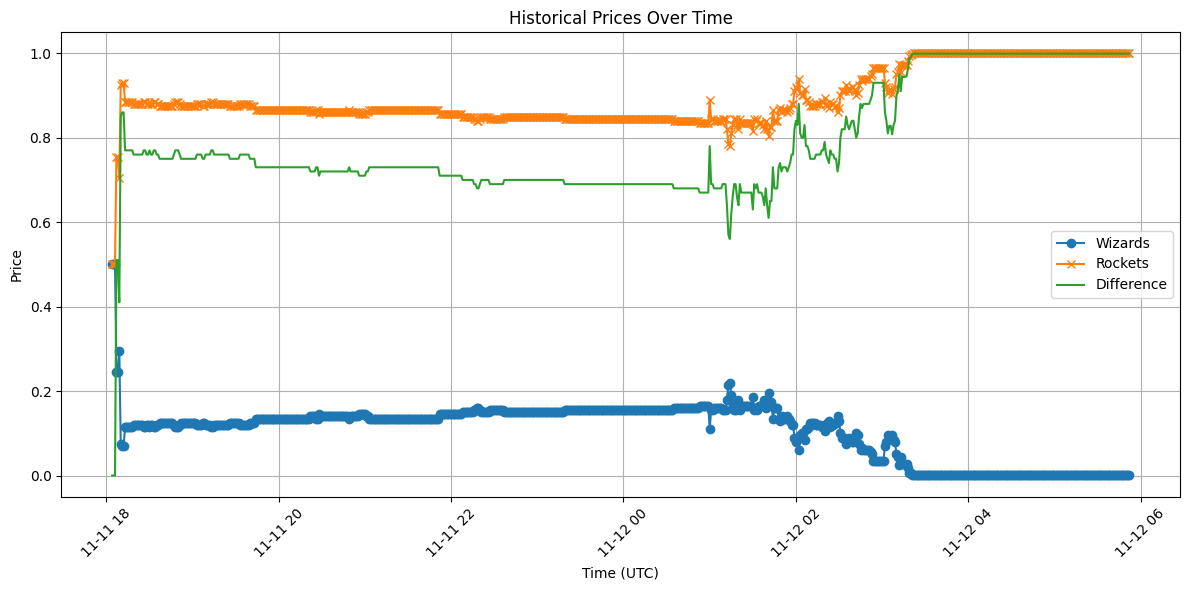

In [111]:
results_game = match_results('Rockets',"2024-11-11")

[[], []]

In [249]:
def cross_points(price_history):
    team_a = price_history[0]
    team_b = price_history[1]
    timeswap = []

    status = 0

    if team_a[0]['p'] > team_b[0]['p']:
        status = 1

    for i in range(len(team_a)):
        if status == 0:
            if team_a[i]['p'] > team_b[i]['p']:
                status = 1
                timeswap.append(team_a[i]['t'])
        else:
            if team_b[i]['p'] > team_a[i]['p']:
                status = 0
                timeswap.append(team_a[i]['t'])
    return timeswap

        
        


    

In [250]:
cross_points(results_game)

[1736559783]

In [244]:
results_game[0][0]['p']

0.385

In [398]:
match_info = matches[(matches['Teams'].apply(lambda x: 'Celtics' in x)) & (matches['startDatehuman'] == datetime(2024,11,1).date())]


In [401]:
match_info['TokenIDs'][0]

['76348545880305132977222565077211084140237639315333556187581412470945595049077',
 '75594350667005802040757138710345798391140673152464844281615500501177515043441']

In [110]:
def match_data(tokenIDs,startDateunix,endDateunix):
    clob_endpoint = "https://clob.polymarket.com"
    url = f"{clob_endpoint}/prices-history"
    home_params = {
        "market":tokenIDs[0],
        "fidelity":1,
        #"interval": "1m"
        "startTs" : startDateunix
       # "endTs":endDateunix
        #"fidelity":"1"
        #"interval":"max",
        #"fidelity": 1
        
    }

    away_params = {
        "market":tokenIDs[1],
        #"fidelity":10,
        "fidelity":1,
        #"interval": "1m"
        "startTs" : startDateunix,
     
        
    }

    response_home = requests.get(url,params = home_params)
    response_away = requests.get(url,params = away_params)

    prices_history = [response_home.json()['history'],response_away.json()['history']]
    #prices_history = [0]['history']
    #prices_history = [1]['history']
    return prices_history

In [ ]:
clob_endpoint = "https://clob.polymarket.com"
url = f"{clob_endpoint}/prices-history"
home_params = {
        "market":'76348545880305132977222565077211084140237639315333556187581412470945595049077',
        "fidelity":1,
        #"interval": "1m"
        "startTs" : startDateunix
       # "endTs":endDateunix
        #"fidelity":"1"
        #"interval":"max",
        #"fidelity": 1
        
    }




response_home = requests.get(url,params = home_params)

In [377]:
matches['startDatehuman']

0     2024-11-01
1     2024-11-01
2     2024-11-01
3     2024-11-01
4     2024-11-01
         ...    
75    2024-11-04
76    2024-11-04
77    2024-11-04
78    2024-11-04
79    2024-11-04
Name: startDatehuman, Length: 80, dtype: object

In [383]:
matches

,Teams,MatchID,TokenIDs,Times,Home,Away,startDate,endDate,startDateunix,endDateunix,startDatehuman
0,"[Celtics, Hornets]",0xc9409aaa5f4aa9c3735d65b73f98f284886f715c9ea0...,[763485458803051329772225650772110841402376393...,"[2024-11-01T16:04:57.682707Z, 2024-11-01T23:00...",Celtics,Hornets,2024-11-01T16:04:57.682707Z,2024-11-01T23:00:00Z,1.730477e+09,1.730502e+09,2024-11-01
1,"[Magic, Cavaliers]",0xa359646f3090873984dc364fc2aadf6c69586d238360...,[301823961258649417836159061230993664932899525...,"[2024-11-01T16:05:34.744867Z, 2024-11-01T23:00...",Magic,Cavaliers,2024-11-01T16:05:34.744867Z,2024-11-01T23:00:00Z,1.730477e+09,1.730502e+09,2024-11-01
2,"[Knicks, Pistons]",0x07e4dc6dbb3e1609873c29de523e2299eb3125f9f39b...,[550390529775987337119535739879383692713294466...,"[2024-11-01T16:06:00.824959Z, 2024-11-01T23:00...",Knicks,Pistons,2024-11-01T16:06:00.824959Z,2024-11-01T23:00:00Z,1.730477e+09,1.730502e+09,2024-11-01
3,"[Lakers, Raptors]",0x8665ec635cfa48e3036ff99f61b6e4a750ada3b841ec...,[992187777288460731278214899045679330432025118...,"[2024-11-01T16:06:27.074278Z, 2024-11-01T23:30...",Lakers,Raptors,2024-11-01T16:06:27.074278Z,2024-11-01T23:30:00Z,1.730477e+09,1.730504e+09,2024-11-01
4,"[Kings, Hawks]",0xab5a38a9ae61bc9a9c874119ed78385c24ecc7c305fc...,[899737934855484743347549449529363185206183549...,"[2024-11-01T16:06:59.713912Z, 2024-11-01T23:30...",Kings,Hawks,2024-11-01T16:06:59.713912Z,2024-11-01T23:30:00Z,1.730477e+09,1.730504e+09,2024-11-01
...,...,...,...,...,...,...,...,...,...,...,...
75,"[Heat, Timberwolves]",0x280a74e8a3f2f0a97eeb3ed7be0f15ba44f85af9e44f...,[108820389943959723622082788695734996755618583...,"[2024-11-04T18:50:10.701913Z, 2024-11-11T00:00...",Heat,Timberwolves,2024-11-04T18:50:10.701913Z,2024-11-11T00:00:00Z,1.730746e+09,1.731283e+09,2024-11-04
76,"[Mavericks, Nuggets]",0x58f838a0a51ba50e6d197a594640bc24b567e7af12fa...,[886348798577938466913669551512782035842379555...,"[2024-11-04T18:51:09.745121Z, 2024-11-11T01:00...",Mavericks,Nuggets,2024-11-04T18:51:09.745121Z,2024-11-11T01:00:00Z,1.730746e+09,1.731287e+09,2024-11-04
77,"[Kings, Suns]",0x1b0f713d721811375a86096ee989ccf8d027dd442b89...,[113666738744182329349375269781276294149654381...,"[2024-11-04T18:51:36.709414Z, 2024-11-11T01:00...",Kings,Suns,2024-11-04T18:51:36.709414Z,2024-11-11T01:00:00Z,1.730746e+09,1.731287e+09,2024-11-04
78,"[Grizzlies, Trail Blazers]",0x8c8e34586708525c9a79ca15d02e01c746808ff258a9...,[608200826912198912250549988499916393704717504...,"[2024-11-04T18:52:29.040756Z, 2024-11-11T02:00...",Grizzlies,Trail Blazers,2024-11-04T18:52:29.040756Z,2024-11-11T02:00:00Z,1.730746e+09,1.731290e+09,2024-11-04


In [391]:
matches

,Teams,MatchID,TokenIDs,Times,Home,Away,startDate,endDate,startDateunix,endDateunix,startDatehuman
0,"[Celtics, Hornets]",0xc9409aaa5f4aa9c3735d65b73f98f284886f715c9ea0...,[763485458803051329772225650772110841402376393...,"[2024-11-01T16:04:57.682707Z, 2024-11-01T23:00...",Celtics,Hornets,2024-11-01T16:04:57.682707Z,2024-11-01T23:00:00Z,1.730477e+09,1.730502e+09,2024-11-01
1,"[Magic, Cavaliers]",0xa359646f3090873984dc364fc2aadf6c69586d238360...,[301823961258649417836159061230993664932899525...,"[2024-11-01T16:05:34.744867Z, 2024-11-01T23:00...",Magic,Cavaliers,2024-11-01T16:05:34.744867Z,2024-11-01T23:00:00Z,1.730477e+09,1.730502e+09,2024-11-01
2,"[Knicks, Pistons]",0x07e4dc6dbb3e1609873c29de523e2299eb3125f9f39b...,[550390529775987337119535739879383692713294466...,"[2024-11-01T16:06:00.824959Z, 2024-11-01T23:00...",Knicks,Pistons,2024-11-01T16:06:00.824959Z,2024-11-01T23:00:00Z,1.730477e+09,1.730502e+09,2024-11-01
3,"[Lakers, Raptors]",0x8665ec635cfa48e3036ff99f61b6e4a750ada3b841ec...,[992187777288460731278214899045679330432025118...,"[2024-11-01T16:06:27.074278Z, 2024-11-01T23:30...",Lakers,Raptors,2024-11-01T16:06:27.074278Z,2024-11-01T23:30:00Z,1.730477e+09,1.730504e+09,2024-11-01
4,"[Kings, Hawks]",0xab5a38a9ae61bc9a9c874119ed78385c24ecc7c305fc...,[899737934855484743347549449529363185206183549...,"[2024-11-01T16:06:59.713912Z, 2024-11-01T23:30...",Kings,Hawks,2024-11-01T16:06:59.713912Z,2024-11-01T23:30:00Z,1.730477e+09,1.730504e+09,2024-11-01
...,...,...,...,...,...,...,...,...,...,...,...
75,"[Heat, Timberwolves]",0x280a74e8a3f2f0a97eeb3ed7be0f15ba44f85af9e44f...,[108820389943959723622082788695734996755618583...,"[2024-11-04T18:50:10.701913Z, 2024-11-11T00:00...",Heat,Timberwolves,2024-11-04T18:50:10.701913Z,2024-11-11T00:00:00Z,1.730746e+09,1.731283e+09,2024-11-04
76,"[Mavericks, Nuggets]",0x58f838a0a51ba50e6d197a594640bc24b567e7af12fa...,[886348798577938466913669551512782035842379555...,"[2024-11-04T18:51:09.745121Z, 2024-11-11T01:00...",Mavericks,Nuggets,2024-11-04T18:51:09.745121Z,2024-11-11T01:00:00Z,1.730746e+09,1.731287e+09,2024-11-04
77,"[Kings, Suns]",0x1b0f713d721811375a86096ee989ccf8d027dd442b89...,[113666738744182329349375269781276294149654381...,"[2024-11-04T18:51:36.709414Z, 2024-11-11T01:00...",Kings,Suns,2024-11-04T18:51:36.709414Z,2024-11-11T01:00:00Z,1.730746e+09,1.731287e+09,2024-11-04
78,"[Grizzlies, Trail Blazers]",0x8c8e34586708525c9a79ca15d02e01c746808ff258a9...,[608200826912198912250549988499916393704717504...,"[2024-11-04T18:52:29.040756Z, 2024-11-11T02:00...",Grizzlies,Trail Blazers,2024-11-04T18:52:29.040756Z,2024-11-11T02:00:00Z,1.730746e+09,1.731290e+09,2024-11-04


In [73]:
matches

,Teams,MatchID,TokenIDs,Times,Home,Away,startDate,endDate,startDateunix,endDateunix,startDatehuman
0,"[Celtics, Thunder]",0x239e6b99a9b73ad1194630ef0940eebc5833fa6c227c...,[373680422332915991423578338814411207068070796...,"[2025-01-05T05:03:26.216381Z, 2025-01-12T20:30...",Celtics,Thunder,2025-01-05T05:03:26.216381Z,2025-01-12T20:30:00Z,1.736053e+09,1.736714e+09,2025-01-12
1,"[Hornets, Cavaliers]",0x7184d0266923c6367e08e791012736f0af42567f77ba...,[909906968266692819589441406102629716580586384...,"[2025-01-05T05:03:50.049106Z, 2025-01-12T23:00...",Hornets,Cavaliers,2025-01-05T05:03:50.049106Z,2025-01-12T23:00:00Z,1.736053e+09,1.736723e+09,2025-01-12
2,"[Pelicans, Wizards]",0xcc1b36e6d242ae34fa16b5f1a3663c5c626a817c33ea...,[817715230621581236639059380991684228202935310...,"[2025-01-05T05:03:50.04559Z, 2025-01-12T23:00:...",Pelicans,Wizards,2025-01-05T05:03:50.04559Z,2025-01-12T23:00:00Z,1.736053e+09,1.736723e+09,2025-01-12
3,"[Jazz, Magic]",0xb38de0b7fea7f08ba0ead1e99c222a2d9ad2f39d83c5...,[113034183908018710499348931422181348073764249...,"[2025-01-05T05:03:56.075553Z, 2025-01-12T23:30...",Jazz,Magic,2025-01-05T05:03:56.075553Z,2025-01-12T23:30:00Z,1.736053e+09,1.736725e+09,2025-01-12
4,"[Lakers, Rockets]",0x2023a25321675b505e0ced19db9bc616573f7ecec1c8...,[316257345570617286485129794131642206294948060...,"[2025-01-05T05:04:09.894215Z, 2025-01-13T00:00...",Lakers,Rockets,2025-01-05T05:04:09.894215Z,2025-01-13T00:00:00Z,1.736053e+09,1.736726e+09,2025-01-13
5,"[Kings, Warriors]",0x8b36c1de760589cc6bb0dcf2836e29da55aa2d3c4cb6...,[265345460000233461273112898305113688977185107...,"[2025-01-05T05:04:19.96861Z, 2025-01-13T01:30:...",Kings,Warriors,2025-01-05T05:04:19.96861Z,2025-01-13T01:30:00Z,1.736053e+09,1.736732e+09,2025-01-13
6,"[Trail Blazers, Pistons]",0x8875759ba96feaf481ceb11d6b839de710232f14282e...,[494404610516254268506729845319008324416779655...,"[2025-01-05T05:04:25.99405Z, 2025-01-14T00:00:...",Trail Blazers,Pistons,2025-01-05T05:04:25.99405Z,2025-01-14T00:00:00Z,1.736053e+09,1.736813e+09,2025-01-14
7,"[Suns, 76ers]",0x8cf4d788d8a5e7c917e2f113a34847a7978c80cd5f32...,[868480212145871080999943105225296487314443224...,"[2025-01-05T05:04:40.951442Z, 2025-01-14T00:00...",Suns,76ers,2025-01-05T05:04:40.951442Z,2025-01-14T00:00:00Z,1.736053e+09,1.736813e+09,2025-01-14
8,"[Bucks, Raptors]",0x0e6ad5f22c7a69dc4653a720ce2b65a55013f1a2549a...,[101137355087346586024217987716658503877812627...,"[2025-01-05T05:04:50.381672Z, 2025-01-14T00:30...",Bucks,Raptors,2025-01-05T05:04:50.381672Z,2025-01-14T00:30:00Z,1.736053e+09,1.736815e+09,2025-01-14
9,"[Pacers, Nets]",0xe215670e7f83c82282c1616515a3d782999077dc89c2...,[111638139604915147485298392951361355629072874...,"[2025-01-05T05:05:11.196905Z, 2025-01-14T00:30...",Pacers,Nets,2025-01-05T05:05:11.196905Z,2025-01-14T00:30:00Z,1.736054e+09,1.736815e+09,2025-01-14


In [78]:
matches[(matches['Teams'].apply(lambda x: 'Celtics' in x)) & (matches['startDatehuman'] == datetime(2025, 1, 11).date())]

,Teams,MatchID,TokenIDs,Times,Home,Away,startDate,endDate,startDateunix,endDateunix,startDatehuman


In [ ]:
39776337126280824759992443155082561344529983076922823452800313495636653784814

In [48]:
import time 
from datetime import datetime
from datetime import datetime as DT


clob_endpoint = "https://clob.polymarket.com"
url = f"{clob_endpoint}/prices-history"

In [76]:
def token_over_time(startDate, endDate, tokenID):
    
    timestamps = [datetime.utcfromtimestamp(entry['t']) for entry in prices_history]
    prices = [entry['p'] for entry in prices_history]
    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(timestamps, prices, marker='o', linestyle='-', label='Price Over Time')
    plt.title('Historical Prices Over Time')
    plt.xlabel('Time (UTC)')
    plt.ylabel('Price')
    plt.grid()
    plt.legend()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout for better appearance

    # Show the plot
    plt.show()

    

In [77]:
clob_api_url = "https://clob.polymarket.com"
market_id = "0xc9409aaa5f4aa9c3735d65b73f98f284886f715c9ea04b53a39ba8943425be18"


In [78]:
token_id = 76348545880305132977222565077211084140237639315333556187581412470945595049077

In [79]:
response = requests.get(clob_api_url)

In [80]:
market_data = response.json()

In [146]:
#for market info
response_clob = requests.get(f"{clob_api_url}/markets/{market_id}")


In [147]:
#for book info
response_clob = requests.get(f"{clob_api_url}/books")


In [115]:
print(json.dumps(markets_data_c,indent = 2))

{
  "enable_order_book": false,
  "active": true,
  "closed": true,
  "archived": false,
  "accepting_orders": false,
  "accepting_order_timestamp": "2024-11-01T16:03:48Z",
  "minimum_order_size": 5,
  "minimum_tick_size": 0.001,
  "condition_id": "0xc9409aaa5f4aa9c3735d65b73f98f284886f715c9ea04b53a39ba8943425be18",
  "question_id": "0x696658140cfc1bd51f90fa165d7fbfcc998d5436678f7ce6acd05294efa57885",
  "question": "Celtics vs. Hornets",
  "description": "In the upcoming NBA game, scheduled for November 1 at 7:00 PM ET:\n\nIf the Boston Celtics win, the market will resolve to \u201cCeltics\u201d.\n\nIf the Charlotte Hornets win, the market will resolve to \u201cHornets\u201d..\n If the game is not completed by November 8, 2024 (11:59 PM ET) or it ends in a tie, the market will resolve 50-50",
  "market_slug": "nba-bos-cha-2024-11-01",
  "end_date_iso": "2024-11-01T00:00:00Z",
  "game_start_time": "2024-11-01T23:00:00Z",
  "seconds_delay": 3,
  "fpmm": "0xaBdDCCe24Bf1734daD7EfA80c58C7d7